This project aims to find the underlying buying patterns of the customers of an automobile part manufacturer based on the past 3 years of the Company's transaction data and hence recommend customized marketing strategies for different segments of customers.

# Problem Statement:
An automobile parts manufacturing company has collected data of transactions for 3 years. They do not have any in-house data science team, thus they have hired you as their consultant. Your job is to use your magical data science skills to provide them with suitable insights about their data and their customers.

# Agenda & Executive Summary of the data

In [50]:
# contents of the presentation

Main aim of project is to find the underlying buying patterns of the customers of an automobile part manufacturer based on the past 3 years of the company's transaction data to improve the business and make some business strategies to increase the revenue.Customer segmentation is basically useful to find the loyal customers.Customers segmentation can be done using either clustering or RFM ( Recency Frequency Monetary ) technique.Hence RFM Technique is used here.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_excel('Sales_Data.xlsx')
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2018-02-24,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,2018-05-07,757,Shipped,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,2018-07-01,703,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,2018-08-25,649,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium
4,10168,36,96.66,1,3479.76,2018-10-28,586,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_excel('Sales_Data.xlsx')
df.isnull().sum()

ORDERNUMBER             0
QUANTITYORDERED         0
PRICEEACH               0
ORDERLINENUMBER         0
SALES                   0
ORDERDATE               0
DAYS_SINCE_LASTORDER    0
STATUS                  0
PRODUCTLINE             0
MSRP                    0
PRODUCTCODE             0
CUSTOMERNAME            0
PHONE                   0
ADDRESSLINE1            0
CITY                    0
POSTALCODE              0
COUNTRY                 0
CONTACTLASTNAME         0
CONTACTFIRSTNAME        0
DEALSIZE                0
dtype: int64

In [3]:
df.shape

(2747, 20)

Agenda & Executive Summary of the data -> Contents of the ppt -> Problem statement -> About Data (Info, Shape, Summary Stats, your assumptions about data)

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_excel('Sales_Data.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ORDERNUMBER           2747 non-null   int64         
 1   QUANTITYORDERED       2747 non-null   int64         
 2   PRICEEACH             2747 non-null   float64       
 3   ORDERLINENUMBER       2747 non-null   int64         
 4   SALES                 2747 non-null   float64       
 5   ORDERDATE             2747 non-null   datetime64[ns]
 6   DAYS_SINCE_LASTORDER  2747 non-null   int64         
 7   STATUS                2747 non-null   object        
 8   PRODUCTLINE           2747 non-null   object        
 9   MSRP                  2747 non-null   int64         
 10  PRODUCTCODE           2747 non-null   object        
 11  CUSTOMERNAME          2747 non-null   object        
 12  PHONE                 2747 non-null   object        
 13  ADDRESSLINE1      

In [5]:
df['ORDERNUMBER']=df['ORDERNUMBER'].astype('object')
df['ORDERLINENUMBER']=df['ORDERLINENUMBER'].astype('object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ORDERNUMBER           2747 non-null   object        
 1   QUANTITYORDERED       2747 non-null   int64         
 2   PRICEEACH             2747 non-null   float64       
 3   ORDERLINENUMBER       2747 non-null   object        
 4   SALES                 2747 non-null   float64       
 5   ORDERDATE             2747 non-null   datetime64[ns]
 6   DAYS_SINCE_LASTORDER  2747 non-null   int64         
 7   STATUS                2747 non-null   object        
 8   PRODUCTLINE           2747 non-null   object        
 9   MSRP                  2747 non-null   int64         
 10  PRODUCTCODE           2747 non-null   object        
 11  CUSTOMERNAME          2747 non-null   object        
 12  PHONE                 2747 non-null   object        
 13  ADDRESSLINE1      

In [7]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# df=pd.read_excel('Sales_Data.xlsx')
df.describe().T

,count,mean,std,min,25%,50%,75%,max
QUANTITYORDERED,2747.0,35.103021,9.762135,6.00,27.000,35.00,43.000,97.00
PRICEEACH,2747.0,101.098951,42.042548,26.88,68.745,95.55,127.100,252.87
SALES,2747.0,3553.047583,1838.953901,482.13,2204.350,3184.80,4503.095,14082.80
DAYS_SINCE_LASTORDER,2747.0,1757.085912,819.280576,42.00,1077.000,1761.00,2436.500,3562.00
MSRP,2747.0,100.691664,40.114802,33.00,68.000,99.00,124.000,214.00


In [8]:
df.shape

(2747, 20)

In [9]:
df.describe(include='object').T

,count,unique,top,freq
ORDERNUMBER,2747,298,10275,18
ORDERLINENUMBER,2747,18,1,298
STATUS,2747,6,Shipped,2541
PRODUCTLINE,2747,7,Classic Cars,949
PRODUCTCODE,2747,109,S18_3232,51
CUSTOMERNAME,2747,89,Euro Shopping Channel,259
PHONE,2747,88,(91) 555 94 44,259
ADDRESSLINE1,2747,89,"C/ Moralzarzal, 86",259
CITY,2747,71,Madrid,304
POSTALCODE,2747,73,28034,259


In [10]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2018-02-24,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,2018-05-07,757,Shipped,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,2018-07-01,703,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,2018-08-25,649,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium
4,10168,36,96.66,1,3479.76,2018-10-28,586,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium


In [11]:
df['STATUS'].value_counts()

Shipped       2541
Cancelled       60
Resolved        47
On Hold         44
In Process      41
Disputed        14
Name: STATUS, dtype: int64

In [12]:
# NEGLECTING Cancelled status observations
df1=df[df['STATUS']!='Cancelled']
df1.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2018-02-24,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,2018-05-07,757,Shipped,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,2018-07-01,703,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,2018-08-25,649,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium
4,10168,36,96.66,1,3479.76,2018-10-28,586,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium


In [13]:
df1['DEALSIZE'].value_counts()

Medium    1316
Small     1219
Large      152
Name: DEALSIZE, dtype: int64

In This case Monetary status is calculated by multiplying Quantity with Unit price and buket them. The value is equivalent to Sales

In [14]:
# df1['Monetary']=df1['QUANTITYORDERED']*df1['PRICEEACH']

In [15]:
# df1['RECENCY']=df1['DAYS_SINCE_LASTORDER']

In [16]:
# df1.groupby(by='CUSTOMERNAME',axis=0)['SALES']

In [17]:
df1.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2018-02-24,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,2018-05-07,757,Shipped,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,2018-07-01,703,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,2018-08-25,649,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium
4,10168,36,96.66,1,3479.76,2018-10-28,586,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium


In [18]:
df1.shape

(2687, 20)

In [19]:
# Univariate Analysis

In [20]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2687 entries, 0 to 2746
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ORDERNUMBER           2687 non-null   object        
 1   QUANTITYORDERED       2687 non-null   int64         
 2   PRICEEACH             2687 non-null   float64       
 3   ORDERLINENUMBER       2687 non-null   object        
 4   SALES                 2687 non-null   float64       
 5   ORDERDATE             2687 non-null   datetime64[ns]
 6   DAYS_SINCE_LASTORDER  2687 non-null   int64         
 7   STATUS                2687 non-null   object        
 8   PRODUCTLINE           2687 non-null   object        
 9   MSRP                  2687 non-null   int64         
 10  PRODUCTCODE           2687 non-null   object        
 11  CUSTOMERNAME          2687 non-null   object        
 12  PHONE                 2687 non-null   object        
 13  ADDRESSLINE1      

Description of QUANTITYORDERED before processing
---------------------
count    2687.000000
mean       35.128396
std         9.782761
min         6.000000
25%        27.000000
50%        35.000000
75%        43.000000
max        97.000000
Name: QUANTITYORDERED, dtype: float64
Histogram of QUANTITYORDERED before processing
+++++++++++++++++


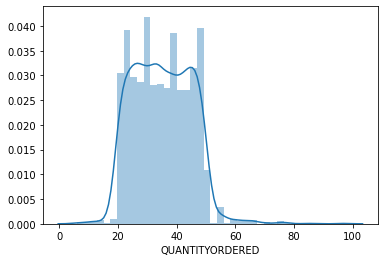

Boxplot of QUANTITYORDERED before processing
***************


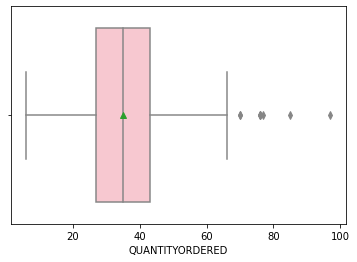

Description of PRICEEACH before processing
---------------------
count    2687.000000
mean      101.222672
std        42.247495
min        26.880000
25%        68.565000
50%        95.700000
75%       127.280000
max       252.870000
Name: PRICEEACH, dtype: float64
Histogram of PRICEEACH before processing
+++++++++++++++++


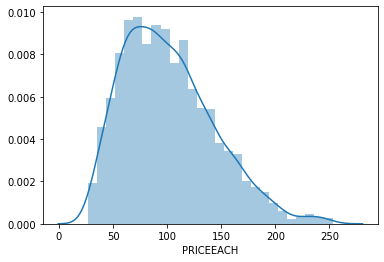

Boxplot of PRICEEACH before processing
***************


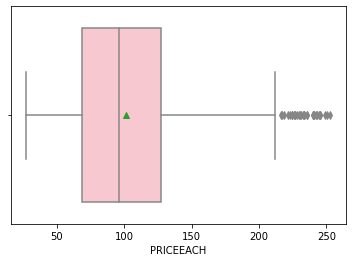

Description of SALES before processing
---------------------
count     2687.000000
mean      3560.005296
std       1847.301293
min        482.130000
25%       2204.350000
50%       3186.480000
75%       4513.760000
max      14082.800000
Name: SALES, dtype: float64
Histogram of SALES before processing
+++++++++++++++++


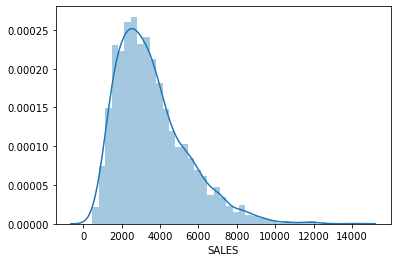

Boxplot of SALES before processing
***************


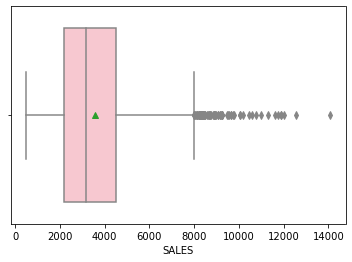

Description of DAYS_SINCE_LASTORDER before processing
---------------------
count    2687.000000
mean     1750.559360
std       817.310272
min        42.000000
25%      1075.000000
50%      1754.000000
75%      2434.000000
max      3562.000000
Name: DAYS_SINCE_LASTORDER, dtype: float64
Histogram of DAYS_SINCE_LASTORDER before processing
+++++++++++++++++


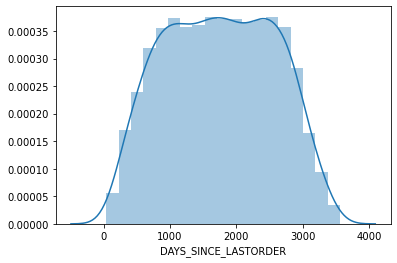

Boxplot of DAYS_SINCE_LASTORDER before processing
***************


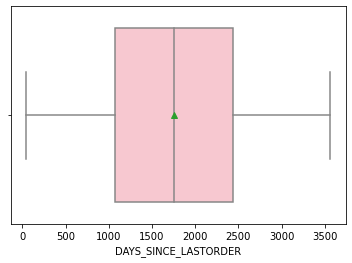

Description of MSRP before processing
---------------------
count    2687.000000
mean      100.796799
std        40.250079
min        33.000000
25%        68.000000
50%        99.000000
75%       124.000000
max       214.000000
Name: MSRP, dtype: float64
Histogram of MSRP before processing
+++++++++++++++++


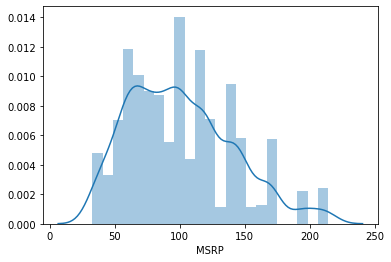

Boxplot of MSRP before processing
***************


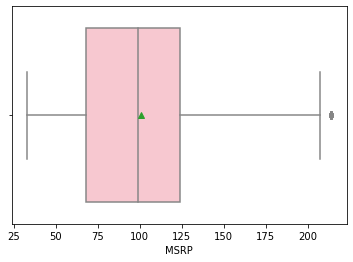

In [21]:
# a=df1.select_dtypes(include=['float64','int64'])
a=df1[['QUANTITYORDERED','PRICEEACH','SALES','DAYS_SINCE_LASTORDER','MSRP']]
for column in a.columns:
    print('Description of',column,'before processing')
    print('---------------------')
    print(a[column].describe())
    
    print('Histogram of',column,'before processing')
    print('+++++++++++++++++')
    sns.distplot(a[column])
    plt.show()
    
    print('Boxplot of',column,'before processing')
    print('***************')
    sns.boxplot(a[column],showmeans=True,color='pink')
    plt.show()

- Quantity ordered ranges from 6 to 97 with a mean of 35.There are few outliers who order more than 65. Investigation has to be done for these customers.

- Price of an itme ranges from 27 to 253.Investigation has to be done for items which have price more than 210.

- Recency or days since last order ranges from 42 to 3562.

- Manufacturer's suggested retail price ranges from 33 to 214 with a median of 99.Focus should be on product with MSRP more than 200.

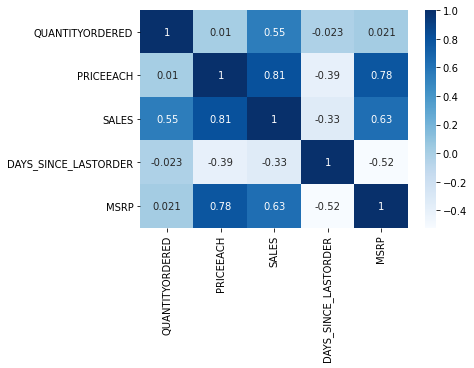

In [22]:
sns.heatmap(a.corr(),annot=True,cmap='Blues');

Sales and Price of the item are highly correlated.

Sales,Price and Days since last order attribute are having negative correlation.

MSRP and Days since last order attrubute are having negative correlation and MSRP and Sales are postively correlated.

Price of an item and Manufacturer suggested retail price are having positive correlation.

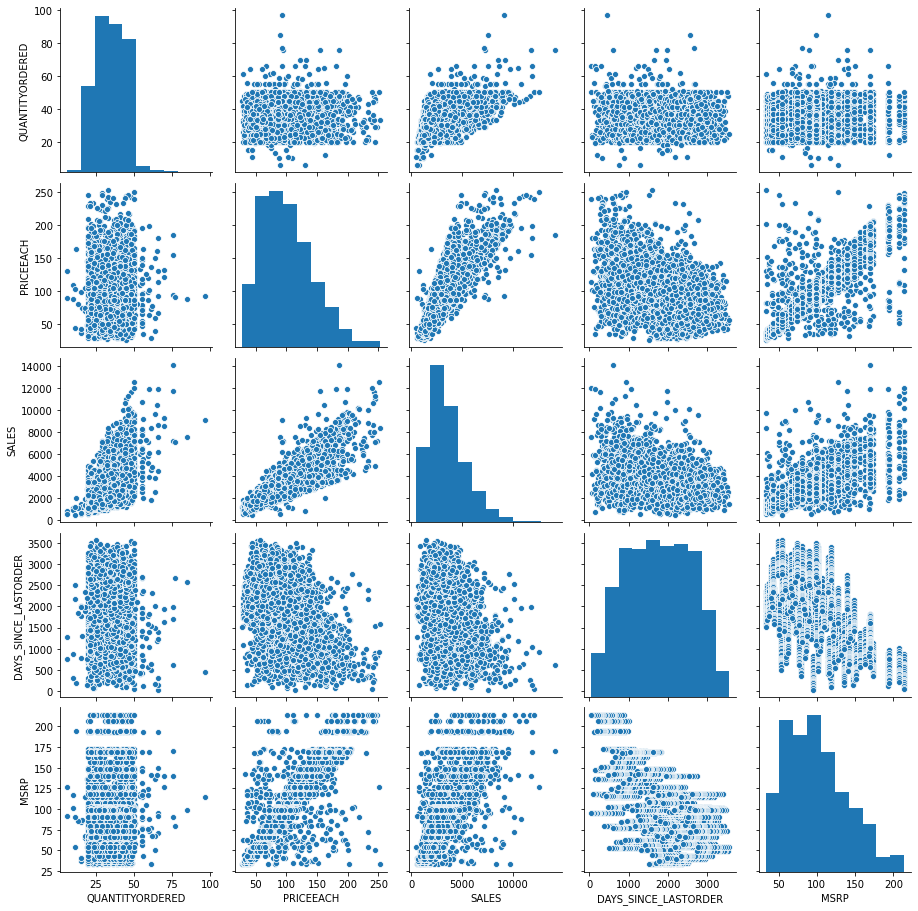

In [73]:
sns.pairplot(a);

In [29]:
DF=pd.DataFrame()
DF['FREQ']=df1.groupby(by='CUSTOMERNAME',axis=0)['ORDERNUMBER'].count()
DF['QUANTITYORDERED']=df1.groupby(by='CUSTOMERNAME',axis=0)['QUANTITYORDERED'].sum()
DF['PRICEEACH']=df1.groupby(by='CUSTOMERNAME',axis=0)['PRICEEACH'].sum()
DF['ORDERLINENUMBER']=df1.groupby(by='CUSTOMERNAME',axis=0)['ORDERLINENUMBER'].count()
DF['MONETARY']=df1.groupby(by='CUSTOMERNAME',axis=0)['SALES'].sum()
DF['ORDERDATE']=df1.groupby(by='CUSTOMERNAME',axis=0)['ORDERDATE'].count()
DF['RECENCY']=df1.groupby(by='CUSTOMERNAME',axis=0)['DAYS_SINCE_LASTORDER'].min()
DF['STATUS']=df1.groupby(by='CUSTOMERNAME',axis=0)['STATUS'].count()
DF['PRODUCTLINE']=df1.groupby(by='CUSTOMERNAME',axis=0)['PRODUCTLINE'].count()
DF['MSRP']=df1.groupby(by='CUSTOMERNAME',axis=0)['MSRP'].sum()
DF['PRODUCTCODE']=df1.groupby(by='CUSTOMERNAME',axis=0)['PRODUCTCODE'].count()
DF['PHONE']=df1.groupby(by='CUSTOMERNAME',axis=0)['PHONE'].max()
DF['ADDRESSLINE1']=df1.groupby(by='CUSTOMERNAME',axis=0)['ADDRESSLINE1'].max()
DF['CITY']=df1.groupby(by='CUSTOMERNAME',axis=0)['CITY'].max()
DF['POSTALCODE']=df1.groupby(by='CUSTOMERNAME',axis=0)['POSTALCODE'].max()
DF['COUNTRY']=df1.groupby(by='CUSTOMERNAME',axis=0)['COUNTRY'].max()
DF['CONTACTLASTNAME']=df1.groupby(by='CUSTOMERNAME',axis=0)['CONTACTLASTNAME'].max()
DF['CONTACTFIRSTNAME']=df1.groupby(by='CUSTOMERNAME',axis=0)['CONTACTFIRSTNAME'].max()
DF['DEALSIZE']=df1.groupby(by='CUSTOMERNAME',axis=0)['DEALSIZE'].max()

In [30]:
pd.set_option('display.max_columns',None)
# pd.options.display.max_columns = None

In [31]:
DF.head()

,FREQ,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,MONETARY,ORDERDATE,RECENCY,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
CUSTOMERNAME,,,,,,,,,,,,,,,,,,,
"AV Stores, Co.",51,1778,4645.31,51,157807.81,51,421,51,51,4735,51,(171) 555-1555,Fauntleroy Circus,Manchester,EC2 5NT,UK,Ashworth,Victoria,Small
Alpha Cognac,20,687,2023.20,20,70488.44,20,675,20,20,1943,20,61.77.6555,1 rue Alsace-Lorraine,Toulouse,31000,France,Roulet,Annette,Small
Amica Models & Co.,26,843,2882.17,26,94117.26,26,328,26,26,2799,26,011-4988555,Via Monte Bianco 34,Torino,10100,Italy,Accorti,Paolo,Small
"Anna's Decorations, Ltd",46,1469,4895.51,46,153996.13,46,131,46,46,4817,46,02 9936 8555,201 Miller Street,North Sydney,2060,Australia,O'Hara,Anna,Small
Atelier graphique,7,270,645.67,7,24179.96,7,312,7,7,669,7,40.32.2555,"54, rue Royale",Nantes,44000,France,Schmitt,Carine,Small


In [32]:
# Bucket MONETARY,RECENCY AND FREQUENCY into various Bins
# Binning or Bucketing with labels
bins_m=np.percentile(DF['MONETARY'],[0,25,50,75,100])
bins_f=np.percentile(DF['FREQ'],[0,25,50,75,100])
bins_r=np.percentile(DF['RECENCY'],[0,25,50,75,100])
labels=['L','M','H','VH']
labels_r=['VH','H','M','L']
DF['MONETARY_Binned']=pd.cut(DF['MONETARY'],bins_m,labels=labels)
DF['FREQ_Binned']=pd.cut(DF['FREQ'],bins_f,labels=labels)
DF['RECENCY_Binned']=pd.cut(DF['RECENCY'],bins_r,labels=labels_r)
DF.head()

,FREQ,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,MONETARY,ORDERDATE,RECENCY,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,MONETARY_Binned,FREQ_Binned,RECENCY_Binned
CUSTOMERNAME,,,,,,,,,,,,,,,,,,,,,,
"AV Stores, Co.",51,1778,4645.31,51,157807.81,51,421,51,51,4735,51,(171) 555-1555,Fauntleroy Circus,Manchester,EC2 5NT,UK,Ashworth,Victoria,Small,VH,VH,M
Alpha Cognac,20,687,2023.20,20,70488.44,20,675,20,20,1943,20,61.77.6555,1 rue Alsace-Lorraine,Toulouse,31000,France,Roulet,Annette,Small,M,M,L
Amica Models & Co.,26,843,2882.17,26,94117.26,26,328,26,26,2799,26,011-4988555,Via Monte Bianco 34,Torino,10100,Italy,Accorti,Paolo,Small,H,H,H
"Anna's Decorations, Ltd",46,1469,4895.51,46,153996.13,46,131,46,46,4817,46,02 9936 8555,201 Miller Street,North Sydney,2060,Australia,O'Hara,Anna,Small,VH,VH,VH
Atelier graphique,7,270,645.67,7,24179.96,7,312,7,7,669,7,40.32.2555,"54, rue Royale",Nantes,44000,France,Schmitt,Carine,Small,L,L,H


In [34]:
DF_f=DF[['RECENCY_Binned','FREQ_Binned','MONETARY_Binned']]
DF_f.head()

,RECENCY_Binned,FREQ_Binned,MONETARY_Binned
CUSTOMERNAME,,,
"AV Stores, Co.",M,VH,VH
Alpha Cognac,L,M,M
Amica Models & Co.,H,H,H
"Anna's Decorations, Ltd",VH,VH,VH
Atelier graphique,H,L,L


In [35]:
d=DF[['RECENCY','FREQ','MONETARY']]
d.head()

,RECENCY,FREQ,MONETARY
CUSTOMERNAME,,,
"AV Stores, Co.",421,51,157807.81
Alpha Cognac,675,20,70488.44
Amica Models & Co.,328,26,94117.26
"Anna's Decorations, Ltd",131,46,153996.13
Atelier graphique,312,7,24179.96


In [36]:
DF_f[(DF_f['RECENCY_Binned']=='VH') & (DF_f['FREQ_Binned']=='VH') & (DF_f['MONETARY_Binned']=='VH')]

,RECENCY_Binned,FREQ_Binned,MONETARY_Binned
CUSTOMERNAME,,,
"Anna's Decorations, Ltd",VH,VH,VH
"Australian Collectors, Co.",VH,VH,VH
La Rochelle Gifts,VH,VH,VH
Land of Toys Inc.,VH,VH,VH
Mini Gifts Distributors Ltd.,VH,VH,VH
Online Diecast Creations Co.,VH,VH,VH
Salzburg Collectables,VH,VH,VH
Souveniers And Things Co.,VH,VH,VH
Technics Stores Inc.,VH,VH,VH


In [37]:
DF_f[(DF_f['RECENCY_Binned']=='L') & (DF_f['FREQ_Binned']=='L') & (DF_f['MONETARY_Binned']=='L')]

,RECENCY_Binned,FREQ_Binned,MONETARY_Binned
CUSTOMERNAME,,,
Auto-Moto Classics Inc.,L,L,L
"Bavarian Collectables Imports, Co.",L,L,L
"Clover Collections, Co.",L,L,L
"Double Decker Gift Stores, Ltd",L,L,L
Gift Ideas Corp.,L,L,L
"Iberia Gift Imports, Corp.",L,L,L
Mini Auto Werke,L,L,L
Royale Belge,L,L,L
Signal Collectibles Ltd.,L,L,L


In [38]:
DF_f[(DF_f['RECENCY_Binned']=='M') & (DF_f['FREQ_Binned']=='M') & (DF_f['MONETARY_Binned']=='M')]

,RECENCY_Binned,FREQ_Binned,MONETARY_Binned
CUSTOMERNAME,,,
Motor Mint Distributors Inc.,M,M,M
Petit Auto,M,M,M


In [42]:
DF_f[(DF_f['RECENCY_Binned']=='M') & (DF_f['FREQ_Binned']=='L') & (DF_f['MONETARY_Binned']=='L')]

,RECENCY_Binned,FREQ_Binned,MONETARY_Binned
CUSTOMERNAME,,,
CAF Imports,M,L,L
Cambridge Collectables Co.,M,L,L
Microscale Inc.,M,L,L
Online Mini Collectables,M,L,L
West Coast Collectables Co.,M,L,L


In [43]:
DF_f[(DF_f['RECENCY_Binned']=='M') & (DF_f['FREQ_Binned']=='M') & (DF_f['MONETARY_Binned']=='L')]

,RECENCY_Binned,FREQ_Binned,MONETARY_Binned
CUSTOMERNAME,,,
Daedalus Designs Imports,M,M,L
Osaka Souveniers Co.,M,M,L


In [44]:
DF_f[(DF_f['RECENCY_Binned']=='M') & (DF_f['FREQ_Binned']=='L') & (DF_f['MONETARY_Binned']=='M')]

,RECENCY_Binned,FREQ_Binned,MONETARY_Binned
CUSTOMERNAME,,,
Mini Caravy,M,L,M
Super Scale Inc.,M,L,M


In [40]:
DF_f[(DF_f['RECENCY_Binned']=='M')]

,RECENCY_Binned,FREQ_Binned,MONETARY_Binned
CUSTOMERNAME,,,
"AV Stores, Co.",M,VH,VH
CAF Imports,M,L,L
Cambridge Collectables Co.,M,L,L
Collectable Mini Designs Co.,M,M,H
Daedalus Designs Imports,M,M,L
Danish Wholesale Imports,M,VH,VH
Handji Gifts& Co,M,VH,H
Herkku Gifts,M,H,H
L'ordine Souveniers,M,VH,VH


In [51]:
DF_f[(DF_f['RECENCY_Binned']=='M')].shape

(22, 3)

In [54]:
DF_f[(DF_f['RECENCY_Binned']=='VH')].head(11)

,RECENCY_Binned,FREQ_Binned,MONETARY_Binned
CUSTOMERNAME,,,
"Anna's Decorations, Ltd",VH,VH,VH
"Australian Collectors, Co.",VH,VH,VH
"Australian Gift Network, Co",VH,L,L
Auto Canal Petit,VH,H,H
Baane Mini Imports,VH,H,H
Collectables For Less Inc.,VH,M,M
Diecast Classics Inc.,VH,H,VH
FunGiftIdeas.com,VH,H,H
Gift Depot Inc.,VH,M,H


In [53]:
DF_f[(DF_f['RECENCY_Binned']=='VH')].tail(11)

,RECENCY_Binned,FREQ_Binned,MONETARY_Binned
CUSTOMERNAME,,,
Land of Toys Inc.,VH,VH,VH
Lyon Souveniers,VH,M,M
Mini Gifts Distributors Ltd.,VH,VH,VH
Online Diecast Creations Co.,VH,VH,VH
"Oulu Toy Supplies, Inc.",VH,H,H
Quebec Home Shopping Network,VH,M,M
Salzburg Collectables,VH,VH,VH
Souveniers And Things Co.,VH,VH,VH
Technics Stores Inc.,VH,VH,VH


In [50]:
DF_f[(DF_f['RECENCY_Binned']=='VH')].shape

(22, 3)

In [ ]:
DF_f[(DF_f['RECENCY_Binned']=='M') & (DF_f['FREQ_Binned']=='VH') & (DF_f['MONETARY_Binned']=='H')]

In [250]:
PV=pd.pivot_table(DF_f,columns=['MONETARY_Binned'],index=['RECENCY_Binned','FREQ_Binned'],aggfunc=len)

In [253]:
PV

MONETARY_Binned               L    M    H    VH
RECENCY_Binned FREQ_Binned                     
VH             L            2.0  NaN  NaN   NaN
               M            NaN  3.0  1.0   NaN
               H            NaN  1.0  4.0   1.0
               VH           NaN  NaN  NaN  10.0
H              L            2.0  1.0  NaN   NaN
               M            1.0  4.0  1.0   NaN
               H            NaN  2.0  7.0   2.0
               VH           NaN  NaN  NaN   1.0
M              L            5.0  2.0  NaN   NaN
               M            2.0  2.0  2.0   NaN
               H            NaN  NaN  2.0   NaN
               VH           NaN  NaN  2.0   5.0
L              L            9.0  1.0  NaN   NaN
               M            1.0  5.0  NaN   NaN
               H            NaN  1.0  3.0   NaN
               VH           NaN  NaN  NaN   2.0

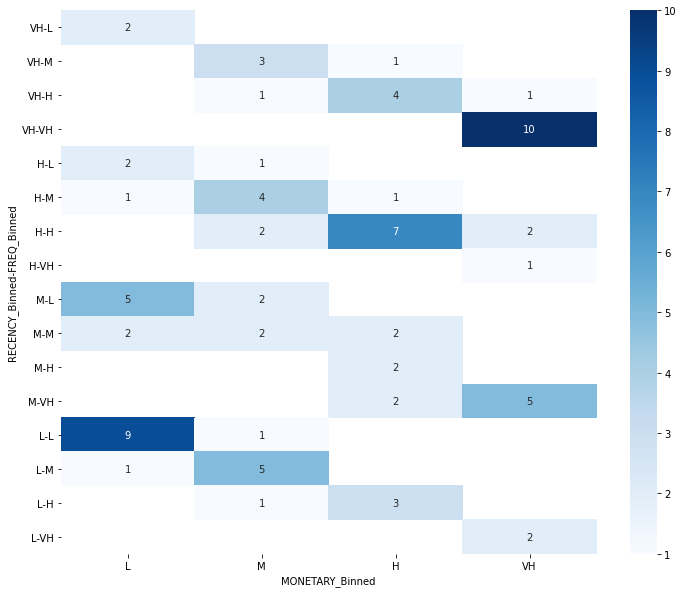

In [279]:
plt.figure(figsize=(12,10))
sns.heatmap(PV,annot=True,cmap='Blues');
plt.yticks(rotation=0);